In [2]:
library(rdydisstools)
setwd('~/notebooks/dissertation')
loadpackages(c('doParallel', 'foreach', 'logging', 'glue', 'grid', 'gridExtra', 'dplyr', 'ggplot2'))
nDatasets <- 5000

In [3]:
registerDoParallel(72)
maxJ <- foreach(i=1:nDatasets, .verbose=FALSE) %dopar% {
    # Initialize logging
    addHandler(writeToFile, file=glue::glue('~/notebooks/dissertation/logs/rq2/sim{i}.log'), level='INFO')
    logstring <- glue::glue('dis.rq2.{i}')
    
    # Specify path for sample
    datasetstring <- glue::glue("~/notebooks/dissertation/data/simsample{i}.RData")
    logging::loginfo(glue::glue('dataset loaded from data/simsample{i}'), logger=logstring)
    
    # load sample dataset into memory
    load(datasetstring)
    logging::loginfo(glue::glue('dataframe has been loaded from: {datasetstring}'), logger=logstring)
    
    # Read coding key for hexaco into object: hexkey
    hexkey <- read.csv('~/notebooks/dissertation/sourcedata/hexkey.csv', header=FALSE)[1:100]
    hexkey <- which(hexkey==-1)
    logging::loginfo(glue::glue('hexaco key has been loaded for reverse coding'), logger=logstring)
    
    # Recode reverse coded items
    rcdf <- rdydisstools::reverseCode(df[,1:100], hexkey, max=7)
    logging::loginfo(glue::glue('reverse coded dataframe has been saved to rcdf'), logger=logstring)
    rcdf <- cbind.data.frame(rcdf, df[,101:102])
    
    # Evaluate RQ 2
    #ls <- dispatchRQ1(df, what='longstring', from=-3, to=3, by=.1, i=i)
    #logging::loginfo(glue::glue('RQ1 - Longstring returned'), logger=logstring)
    #eo <- dispatchRQ1(rcdf, what="evenodd", factors=rep(10,10), from=-3, to=3, by=.1, i=i)
    #logging::loginfo(glue::glue('RQ1 - EvenOdd returned'), logger=logstring)
    #md <- dispatchRQ1(rcdf, what="mahad", from=-3, to=3, by=.1, i=i)
    #logging::loginfo(glue::glue('RQ1 - mahalanobis returned'), logger=logstring)
    
    # summarize results for RQ 2
    lsMaxJ <- maxLookup(ls$informedness)
    logging::loginfo(glue::glue('lsMaxJ is {lsMaxJ}'), logger=logstring)
    eoMaxJ <- maxLookup(eo$informedness)
    logging::loginfo(glue::glue('eoMaxJ is {eoMaxJ}'), logger=logstring)
    mdMaxJ <- maxLookup(md$informedness)
    logging::loginfo(glue::glue('mdMaxJ is {mdMaxJ}'), logger=logstring)
    
    save(ls, file=glue::glue('~/notebooks/dissertation/artifacts/rq1/ls/sim{i}.RData'))
    save(eo, file=glue::glue('~/notebooks/dissertation/artifacts/rq1/eo/sim{i}.RData'))
    save(md, file=glue::glue('~/notebooks/dissertation/artifacts/rq1/md/sim{i}.RData'))
    
    cbind.data.frame(ls=lsMaxJ, eo=eoMaxJ, md=mdMaxJ)
} %>% do.call("rbind.data.frame", .)

save(maxJ, file='~/notebooks/dissertation/artifacts/rq1/maxJ.RData')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


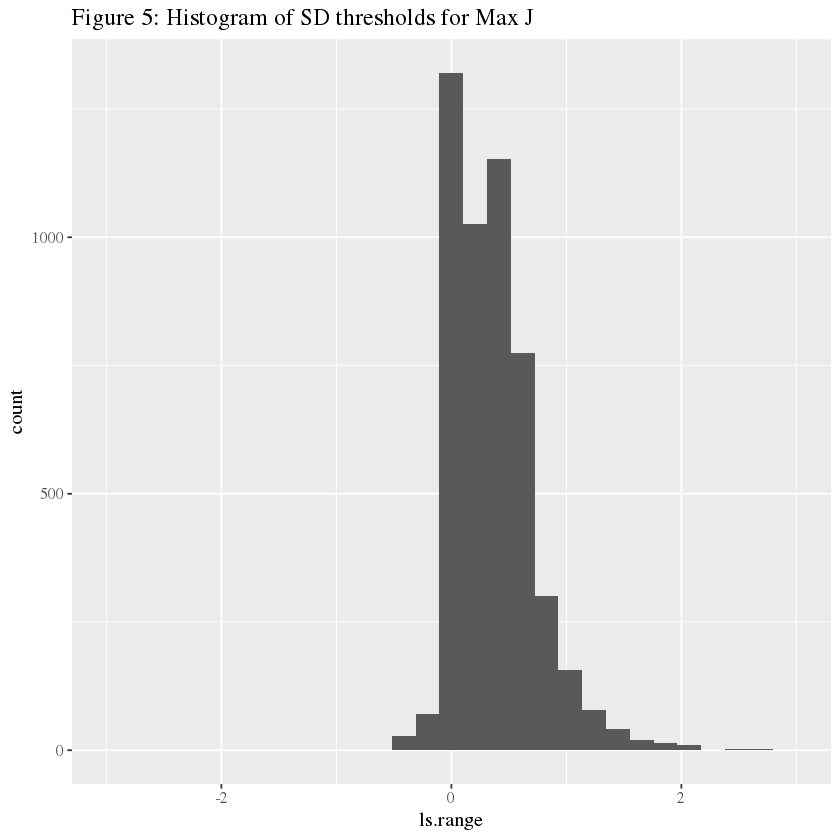

In [11]:
load(file='~/notebooks/dissertation/artifacts/rq1/maxJ.RData')
maxJ %>% ggplot(aes(x=ls.range)) + geom_histogram(aes(y=stat(count))) +
    ggtitle(glue::glue('Figure 5: Histogram of SD thresholds for Max J')) +
    xlim(c(-3,3)) +
    theme(legend.position="bottom", text=element_text(family="Times New Roman", size=12))



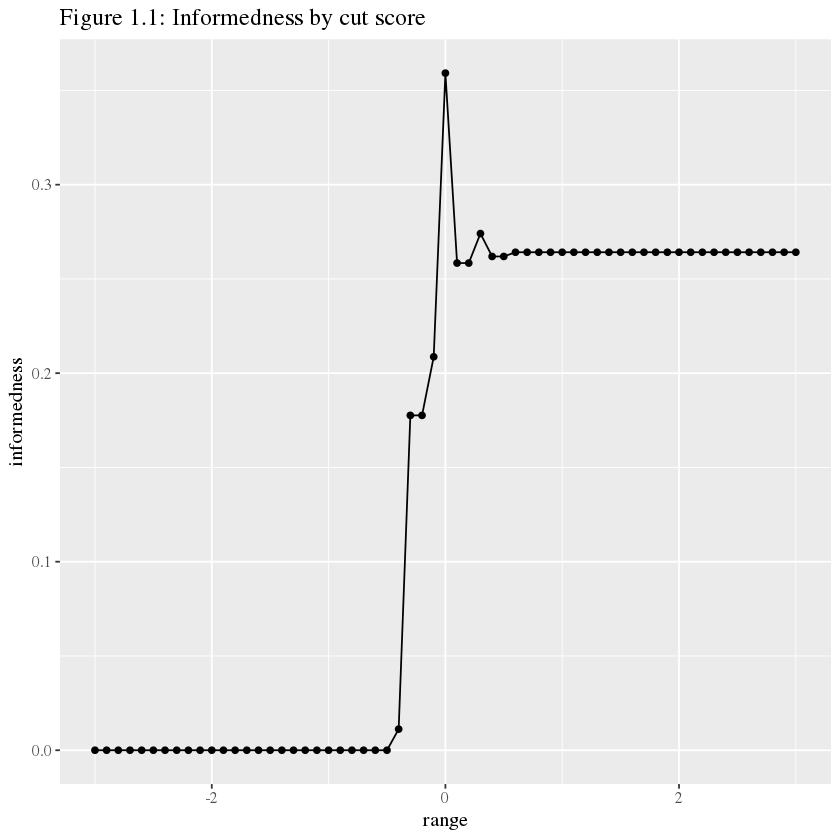

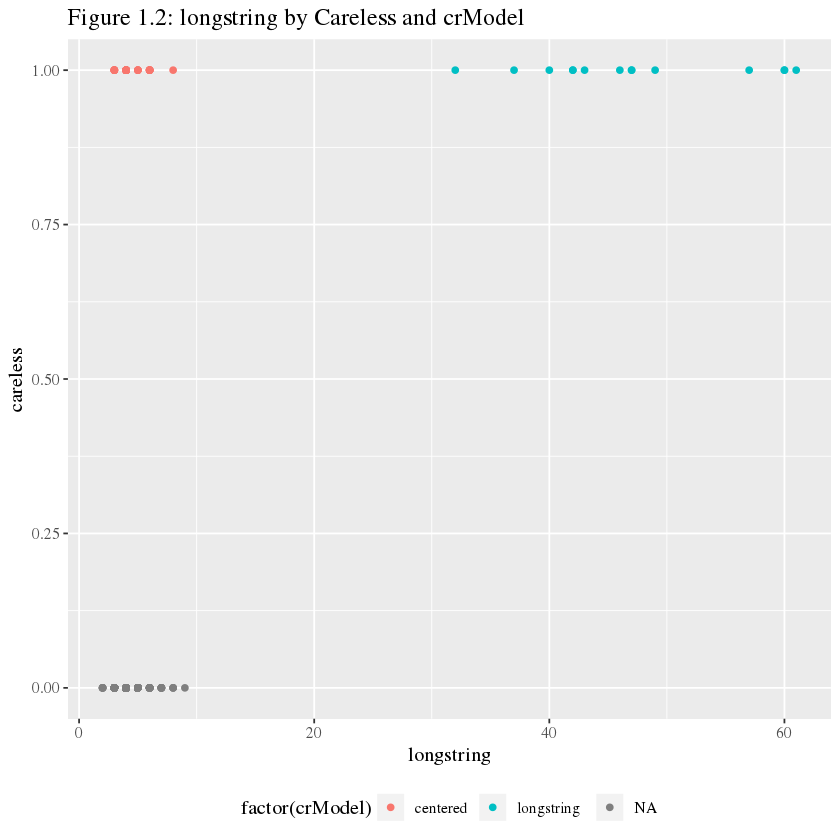

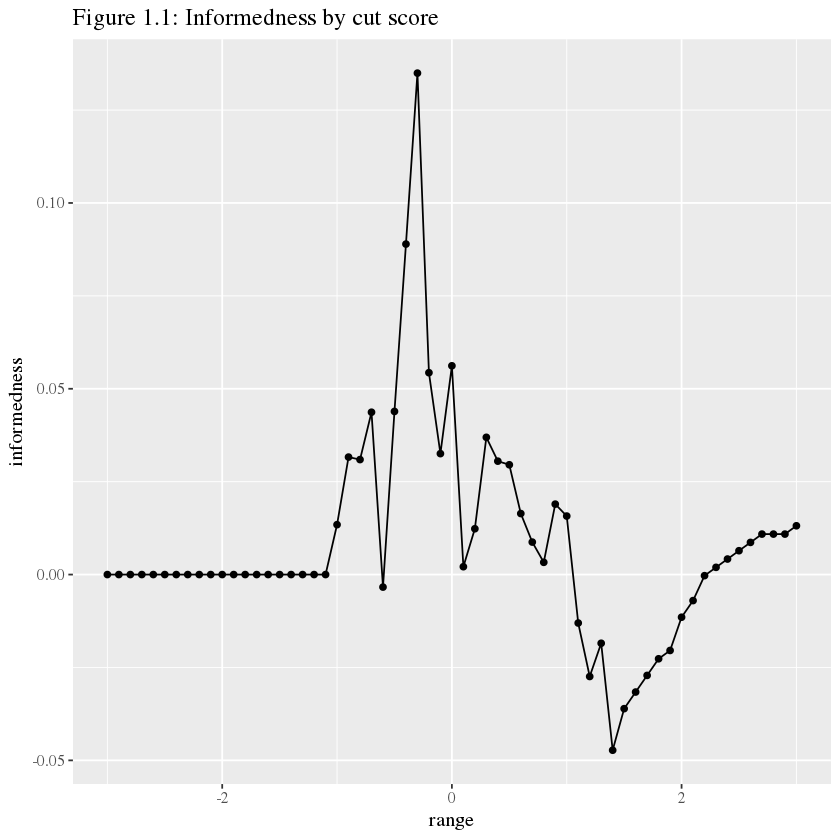

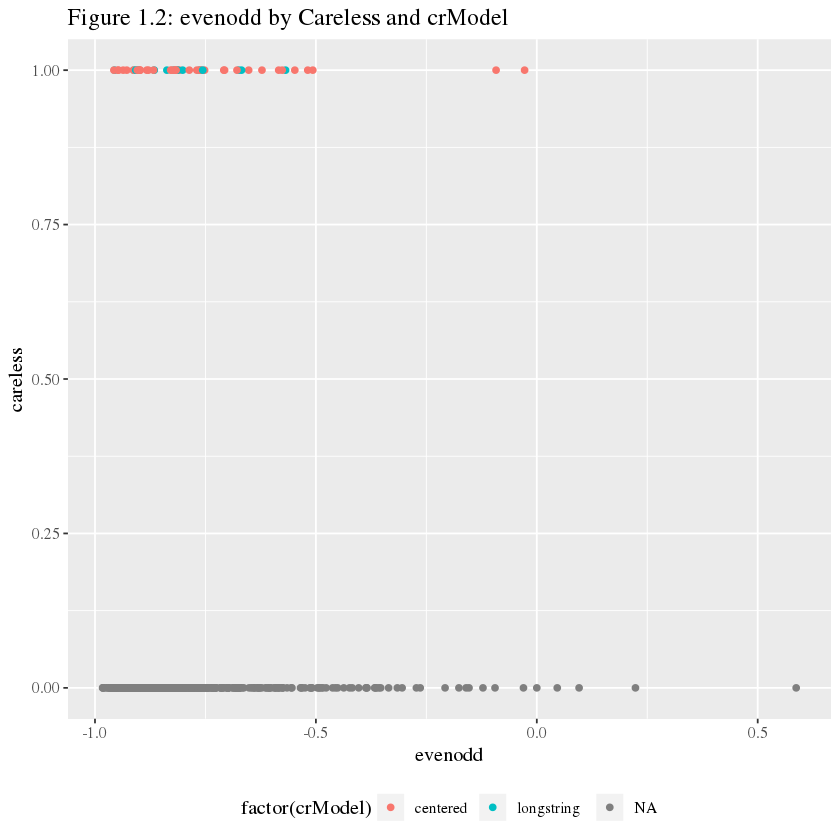

[[1]]

[[2]]

[[3]]

[[4]]

[[5]]

[[6]]


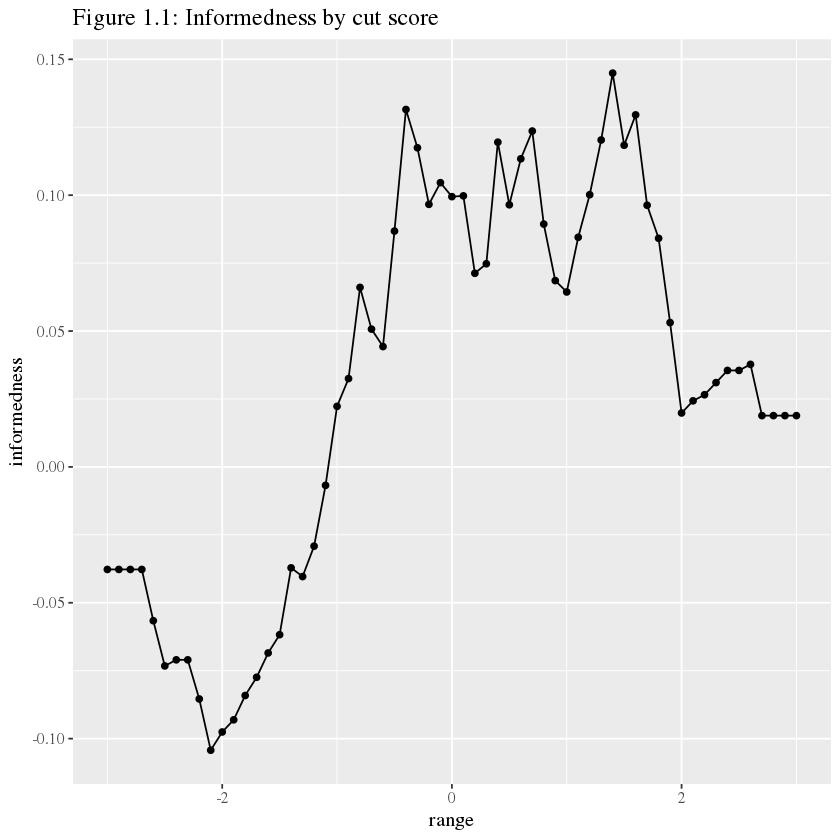

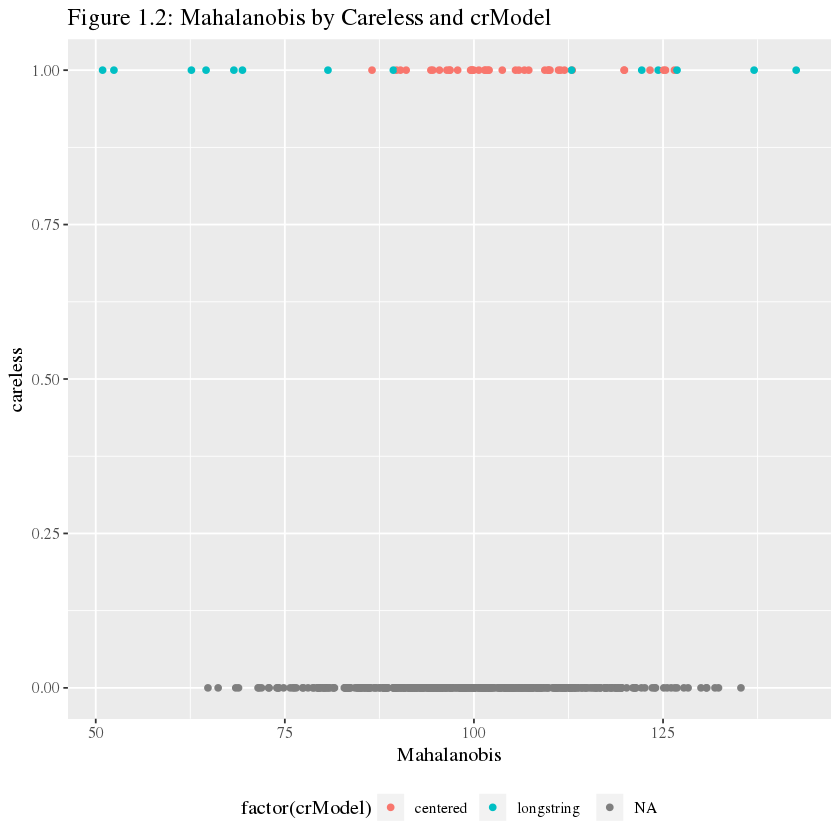

In [2]:
i <- 1
datasetstring <- glue::glue("data/simsample{i}.RData")
load(datasetstring)
hexkey <- read.csv('sourcedata/hexkey.csv', header=FALSE)[1:100]
hexkey <- which(hexkey==-1)
    
rcdf <- rdydisstools::reverseCode(df[,1:100], hexkey, max=7)
rcdf <- cbind(rcdf, df[,101:102])
    
ls <- dispatchRQ1(df, what='longstring', from=-3, to=3, by=.1, i=i)
eo <- dispatchRQ1(rcdf, what="evenodd", factors=rep(10,10), from=-3, to=3, by=.1, i=i)
md <- dispatchRQ1(rcdf, what="mahad", from=-3, to=3, by=.1, i=i)

lsJPlot <- plot(ls$informedness, i)
lsCRMetricPlot <- plot(ls$metric, 'longstring', i)
eoJPlot <- plot(eo$informedness, i)
eoCRMetricPlot <- plot(eo$metric, 'evenodd', i)
mdJPlot <- plot(md$informedness, i)
mdCRMetricPlot <- plot(md$metric, "Mahalanobis", i)
    
    
list(lsJPlot, lsCRMetricPlot, eoJPlot, eoCRMetricPlot, mdJPlot, mdCRMetricPlot)

In [ ]:
ggplot(maxJ, aes(ls)) + geom_histogram() + stat_bin(breaks=seq(-3,3,.1), binwidth=.1) + scale_x_continuous(breaks=seq(-3,3,1))
ggplot(maxJ, aes(eo)) + geom_histogram() + stat_bin(breaks=seq(-3,3,.1), binwidth=.1) + scale_x_continuous(breaks=seq(-3,3,1))
ggplot(maxJ, aes(md)) + geom_histogram() + stat_bin(breaks=seq(-3,3,.1), binwidth=.1) + scale_x_continuous(breaks=seq(-3,3,1))

In [2]:
clearExperiment('rq2')

Warning message in file.remove(glue::glue("logs/{hypothesis}/*")):
“cannot remove file 'logs/rq1/*', reason 'No such file or directory'”Warning message in file.remove(glue::glue("artifacts/{hypothesis}/ls/*")):
“cannot remove file 'artifacts/rq1/ls/*', reason 'No such file or directory'”Warning message in file.remove(glue::glue("artifacts/{hypothesis}/eo/*")):
“cannot remove file 'artifacts/rq1/eo/*', reason 'No such file or directory'”Warning message in file.remove(glue::glue("artifacts/{hypothesis}/md/*")):
“cannot remove file 'artifacts/rq1/md/*', reason 'No such file or directory'”

[1] FALSE

In [3]:
file.remove('~/notebooks/dissertation/logs/rq2/*')

Warning message in file.remove("~/notebooks/dissertation/logs/rq1/*"):
“cannot remove file '~/notebooks/dissertation/logs/rq1/*', reason 'No such file or directory'”

[1] FALSE